In [42]:
#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in dataset
df=pd.read_csv('datasets/lead_convert.csv',index_col=0)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

There are 303070 rows and 14 columns


,lead_hour_of_registration,lead_utm_source,lead_utm_medium,lead_weekday_of_registration,lead_month_day_of_registration,lead_ip_country_code,lead_ua_device_class,redirect_hour,redirect_weekday,redirect_month_day,hours_since_registration,different_redirect_sources,hours_since_last_revenue,conversion_revenue
0,12.0,twitter,social,7.0,4.0,usa,Phone,10.0,1.0,5.0,21.242587,0,0.0,0
1,12.0,twitter,social,7.0,4.0,usa,Phone,15.0,1.0,5.0,27.088106,1,0.0,0
2,10.0,google_ads,social,5.0,5.0,usa,Phone,9.0,2.0,13.0,935.132797,2,0.0,0
3,10.0,google_ads,social,5.0,5.0,usa,Phone,9.0,2.0,13.0,935.297885,2,0.0,0
4,10.0,google_ads,social,5.0,5.0,usa,Phone,9.0,2.0,13.0,935.306091,2,0.0,0


In [3]:
#improve column name
df=df.rename(columns={'lead_ip_country_code':'lead_country_of_registration'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303070 entries, 0 to 314150
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_hour_of_registration       303070 non-null  float64
 1   lead_utm_source                 303070 non-null  object 
 2   lead_utm_medium                 303064 non-null  object 
 3   lead_weekday_of_registration    303070 non-null  float64
 4   lead_month_day_of_registration  303070 non-null  float64
 5   lead_country_of_registration    303070 non-null  object 
 6   lead_ua_device_class            303070 non-null  object 
 7   redirect_hour                   303070 non-null  float64
 8   redirect_weekday                303070 non-null  float64
 9   redirect_month_day              303070 non-null  float64
 10  hours_since_registration        303070 non-null  float64
 11  different_redirect_sources      303070 non-null  int64  
 12  hours_since_last

In [5]:
#check for missing values
df.isnull().sum()

lead_hour_of_registration         0
lead_utm_source                   0
lead_utm_medium                   6
lead_weekday_of_registration      0
lead_month_day_of_registration    0
lead_country_of_registration      0
lead_ua_device_class              0
redirect_hour                     0
redirect_weekday                  0
redirect_month_day                0
hours_since_registration          0
different_redirect_sources        0
hours_since_last_revenue          0
conversion_revenue                0
dtype: int64

In [6]:
#percentage of missing values
(df.isnull().sum()/len(df))*100

lead_hour_of_registration         0.00000
lead_utm_source                   0.00000
lead_utm_medium                   0.00198
lead_weekday_of_registration      0.00000
lead_month_day_of_registration    0.00000
lead_country_of_registration      0.00000
lead_ua_device_class              0.00000
redirect_hour                     0.00000
redirect_weekday                  0.00000
redirect_month_day                0.00000
hours_since_registration          0.00000
different_redirect_sources        0.00000
hours_since_last_revenue          0.00000
conversion_revenue                0.00000
dtype: float64

#### Only the lead_utm_medium has missing values, but only 6 of them, accounting for less than 1% of it

In [7]:
df['lead_utm_source'].value_counts(normalize=True)*100

facebook      44.653710
twitter       29.292903
google_ads    20.798825
youtube        3.270862
newsletter     1.293431
medium         0.409806
instagram      0.280463
Name: lead_utm_source, dtype: float64

In [8]:
#filling the missing values with the mode
df['lead_utm_medium']=df['lead_utm_medium'].fillna(df['lead_utm_medium'].mode()[0])

In [9]:
#confirming there are no mising values anymore
df.isnull().sum()

lead_hour_of_registration         0
lead_utm_source                   0
lead_utm_medium                   0
lead_weekday_of_registration      0
lead_month_day_of_registration    0
lead_country_of_registration      0
lead_ua_device_class              0
redirect_hour                     0
redirect_weekday                  0
redirect_month_day                0
hours_since_registration          0
different_redirect_sources        0
hours_since_last_revenue          0
conversion_revenue                0
dtype: int64

In [10]:
df['conversion_revenue'].describe()

count    303070.000000
mean          1.249282
std           7.311844
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          90.000000
Name: conversion_revenue, dtype: float64

In [11]:
np.percentile(df['conversion_revenue'],99)

30.0

In [12]:
#I would create a new feature called converted, where any revenue above 0 means lead was converted and below 0 means lead was not converted
df['converted']=np.repeat(df.conversion_revenue.values,1)
df['converted']=pd.Series(np.where(df['converted'].values == 0, 0, 1),df.index)

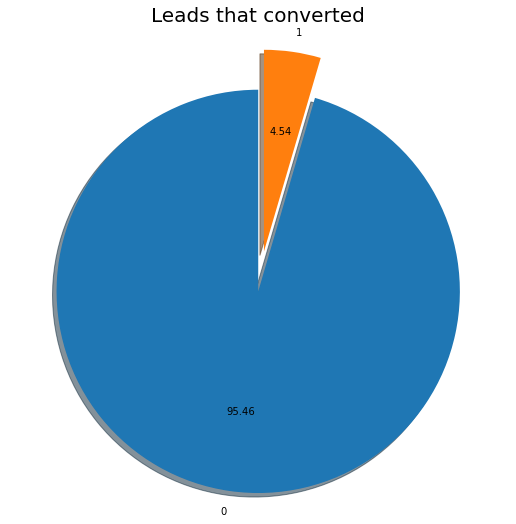

In [13]:
fig1, ax1 = plt.subplots(figsize=(9,9))
explode=(0.1,0.1)
plt.pie(df['converted'].value_counts(),labels=df['converted'].unique(), explode=explode,shadow=True,
        startangle=90,autopct='%.2f')
ax1.axis('equal');
ax1.set_title('Leads that converted',fontdict={'size':20});

#### 1 refers to leads that converted, and 0 refers to lead not converting
#### 95.46% of leads did not convert, which suggests this app needs to do better to convert more leads to make more profit

In [14]:
df['lead_country_of_registration'].value_counts(normalize=True)*100

usa             98.972185
uk               0.529911
india            0.206553
france           0.085459
russia           0.045534
china            0.040585
south_africa     0.029366
germany          0.025077
nigeria          0.020787
japan            0.015508
italy            0.011219
pakistan         0.009899
ghana            0.007919
Name: lead_country_of_registration, dtype: float64

#### Most leads reside in the United states, with over 98% of leads, the rest of the countries accoutn for less than 1%

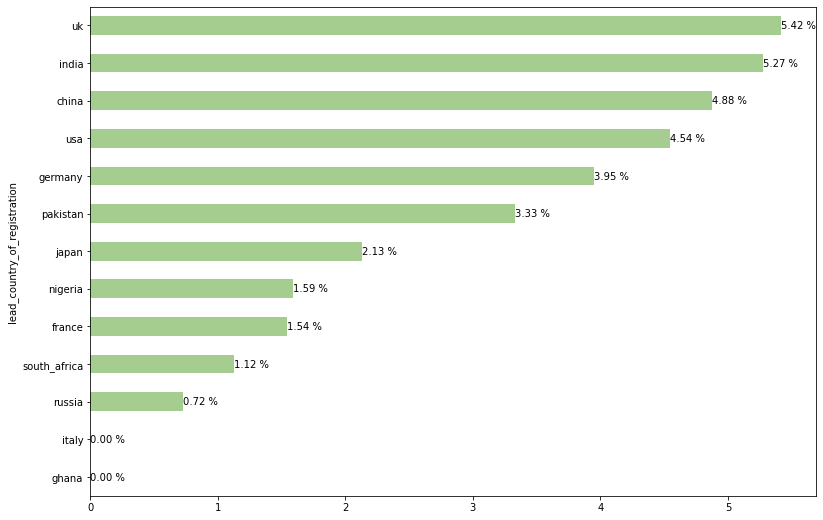

In [15]:
plt.figure(figsize=(13,9))
ax=pd.crosstab(df['lead_country_of_registration'], df['converted'],normalize='index')[1].mul(100).sort_values(ascending=True).plot(kind='barh',cmap='crest')
ax.bar_label(ax.containers[0], fmt='%.2f %%');

#### Even though the United states accounted for nearly 99% of all leads, less than 5% of them converted
#### The UK which accounted for less than 1% of all leads, had the most leads converting, with around 5.27% of leads converting
#### Italy and Ghana had no lead converting

In [16]:
df['lead_utm_source'].value_counts(normalize=True)*100

facebook      44.653710
twitter       29.292903
google_ads    20.798825
youtube        3.270862
newsletter     1.293431
medium         0.409806
instagram      0.280463
Name: lead_utm_source, dtype: float64

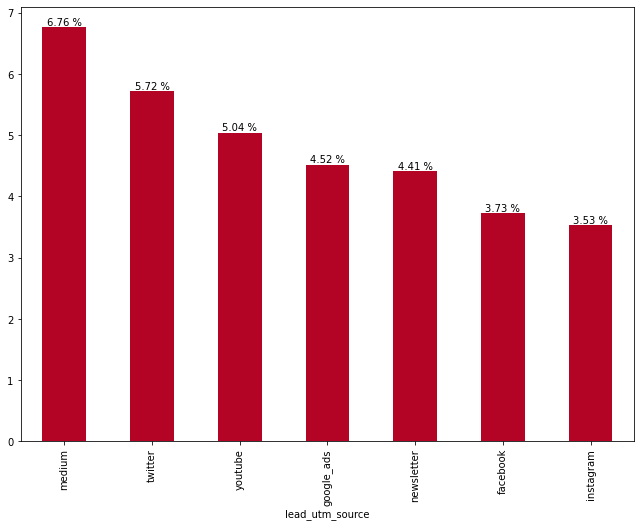

In [17]:
plt.figure(figsize=(11,8))
ax=pd.crosstab(df['lead_utm_source'], df['converted'],normalize='index')[1].mul(100).sort_values(ascending=False).plot(kind='bar',cmap='coolwarm_r')
ax.bar_label(ax.containers[0], fmt='%.2f %%');

#### Facebook is the source that most leads redirect from, but only 3.73% of leads convert from there
#### Medium redirection acounts for the most lead conversion with 6.76%, even though less than 1% of all leads redirect from there

In [18]:
df['lead_hour_of_registration'].describe()

count    303070.000000
mean          8.677593
std           5.762702
min           0.000000
25%           4.000000
50%           8.000000
75%          13.000000
max          23.000000
Name: lead_hour_of_registration, dtype: float64

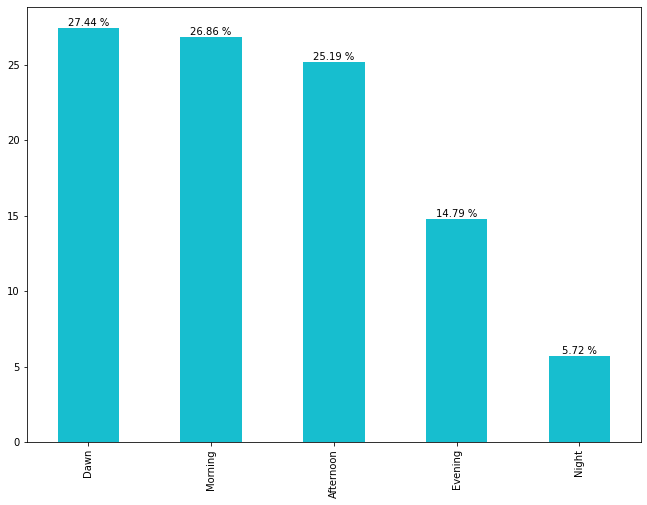

In [19]:
#creating time of registraion from hour of registration
df['lead_time_of_registration']=pd.cut(df['lead_hour_of_registration'], [0,5,9,14,20,24], labels=['Dawn','Morning','Afternoon','Evening','Night'], right=False,include_lowest=True)
ax=(df['lead_time_of_registration'].value_counts(normalize=True)*100).plot(kind='bar',figsize=(11,8),cmap='tab10_r')
ax.bar_label(ax.containers[0], fmt='%.2f %%');

#### Most leads check out the app and register at dawn, with a little over 27% of them doing so
#### Night time is the time of the day with the least amount of leads registering with a little below 6% of leads

In [20]:
(df['lead_utm_medium'].value_counts()/ len(df['lead_utm_medium']))*100

social            98.195796
paid               0.512423
email              0.422015
affiliates         0.358993
banner             0.280463
cpc                0.214802
organic_search     0.010889
display            0.004619
Name: lead_utm_medium, dtype: float64

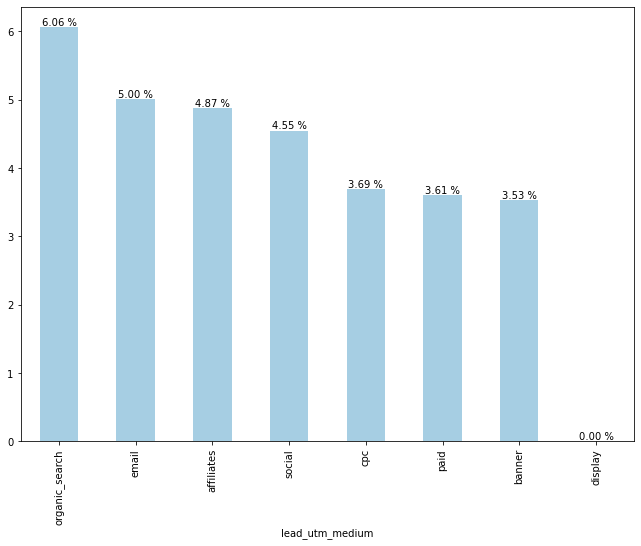

In [21]:
plt.figure(figsize=(11,8))
ax=pd.crosstab(df['lead_utm_medium'], df['converted'],normalize='index')[1].mul(100).sort_values(ascending=False).plot(kind='bar',cmap='Paired')
ax.bar_label(ax.containers[0], fmt='%.2f %%');

#### leads from social media sites account for about 98% of all leads, but only 4.55% of them converted
#### leads who use organic search have the most leads converting with around 6% of them converting, while they have less than 1% of all leads using organic searches

In [22]:
df['hours_since_registration'].describe()

count    303070.000000
mean        879.456764
std        1675.665454
min           0.001011
25%          16.307794
50%         189.447758
75%         803.832045
max        9488.343941
Name: hours_since_registration, dtype: float64

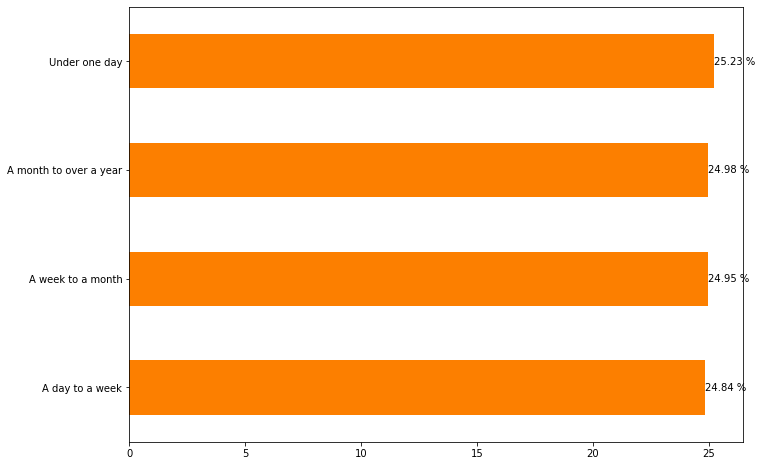

In [23]:
df['Time since registration']=pd.cut(df['hours_since_registration'], [0,17,190,805,9490], labels=['Under one day','A day to a week','A week to a month','A month to over a year'], right=False,include_lowest=True)
ax=(df['Time since registration'].value_counts(normalize=True)*100).sort_values(ascending=True).plot(kind='barh',figsize=(11,8),cmap='Wistia_r')
ax.bar_label(ax.containers[0], fmt='%.2f %%');

#### Most people check the app and register on that same app, with 25.23% of people doing that
#### Generally, theres not much difference between the time individuals first check the app, and the time they register
#### Even those that wait for a month to a year account fo 24.98%, which isnt that much different from the 25.23% of peope that do so in a day

In [24]:
df.head(1)

,lead_hour_of_registration,lead_utm_source,lead_utm_medium,lead_weekday_of_registration,lead_month_day_of_registration,lead_country_of_registration,lead_ua_device_class,redirect_hour,redirect_weekday,redirect_month_day,hours_since_registration,different_redirect_sources,hours_since_last_revenue,conversion_revenue,converted,lead_time_of_registration,Time since registration
0,12.0,twitter,social,7.0,4.0,usa,Phone,10.0,1.0,5.0,21.242587,0,0.0,0,0,Afternoon,A day to a week


In [25]:
#extracting weekday from day of week
df['lead_weekday_of_registration']=np.where((df['lead_weekday_of_registration']) < 5,'weekday','weekend')

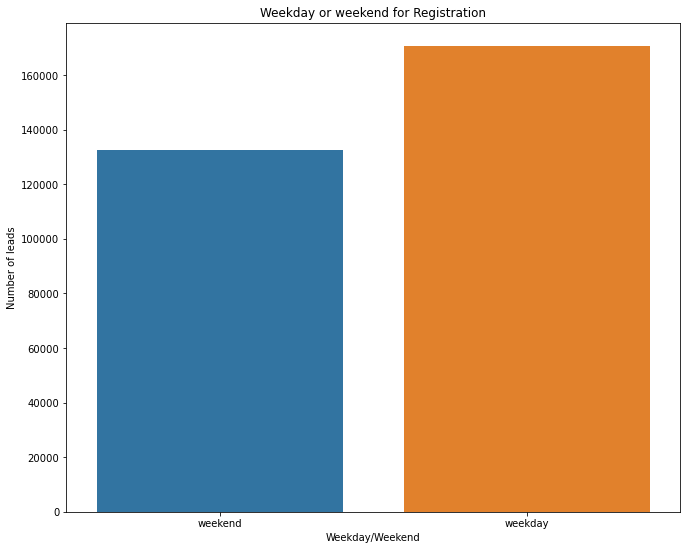

In [26]:
plt.figure(figsize=(11,9))
sns.countplot(x='lead_weekday_of_registration', data=df)
plt.xlabel('Weekday/Weekend')
plt.ylabel('Number of leads')
plt.title('Weekday or weekend for Registration');

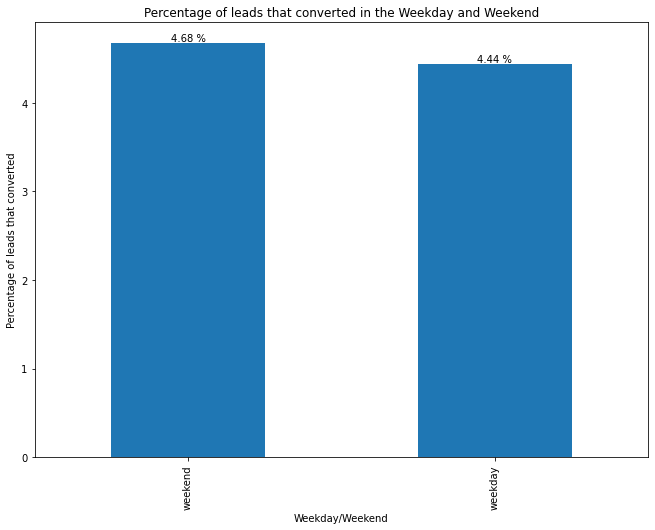

In [27]:
plt.figure(figsize=(11,8))
leadweek=pd.crosstab(df['lead_weekday_of_registration'], df['converted'],normalize='index').mul(100).sort_values(by=1,ascending=False)
ax = leadweek[1].plot.bar(rot=90)
ax.bar_label(ax.containers[0], fmt='%.2f %%')
ax.margins(x=15)
ax.set_xlabel('Weekday/Weekend')
ax.set_ylabel('Percentage of leads that converted')
plt.title('Percentage of leads that converted in the Weekday and Weekend')
plt.show()

In [28]:
df['lead_ua_device_class'].value_counts(normalize=True)*100

Phone          93.892500
Desktop         5.089913
Tablet          0.697199
Unknown         0.280463
Set-top box     0.016828
Mobile          0.016498
TV              0.006599
Name: lead_ua_device_class, dtype: float64

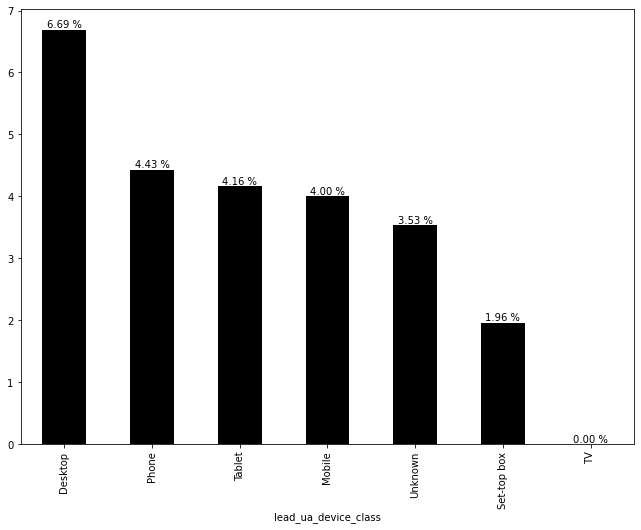

In [29]:
plt.figure(figsize=(11,8))
ax=pd.crosstab(df['lead_ua_device_class'], df['converted'],normalize='index')[1].mul(100).sort_values(ascending=False).plot(kind='bar',cmap='gist_heat')
ax.bar_label(ax.containers[0], fmt='%.2f %%');

#### Phone is the device most leads use to register for the app, with almost 94% of all leads registering with it, but only 4.43% of such leads converted
#### Desktop has the highest conversion rate, with around 6.69% of all leads converting when they used desktop to sign up, but only 5% of all leads signed up using the desktop